In [1]:
import numpy as np
from scipy.stats import norm, multivariate_normal  # 正規分布と多変量正規分布
import pandas as pd
import matplotlib.pyplot as plt

# from IPython.html.widgets import interact
from ipywidgets import interact

%matplotlib inline

In [2]:
plt.style.use("ggplot")
np.random.seed(123)

In [3]:
mu = np.array([1, 2])  # それぞれの平均
cov = np.array([[1.0, 0.7],[0.7, 1.0]])  # 分散（各1.0）、共分散（0.7）

In [4]:
# 分布の可視化のため、
x = np.arange(-2, 4, 0.01)
y = np.arange(-1, 5, 0.01)
X, Y = np.meshgrid(x,y)  # 格子座標を作成
pos = np.zeros([X.shape[0],X.shape[1],2])  # 600,600,2
pos[:,:,0] = X
pos[:,:,1] = Y

In [5]:
pos.shape

(600, 600, 2)

In [9]:
X,Y

(array([[-2.  , -1.99, -1.98, ...,  3.97,  3.98,  3.99],
        [-2.  , -1.99, -1.98, ...,  3.97,  3.98,  3.99],
        [-2.  , -1.99, -1.98, ...,  3.97,  3.98,  3.99],
        ...,
        [-2.  , -1.99, -1.98, ...,  3.97,  3.98,  3.99],
        [-2.  , -1.99, -1.98, ...,  3.97,  3.98,  3.99],
        [-2.  , -1.99, -1.98, ...,  3.97,  3.98,  3.99]]),
 array([[-1.  , -1.  , -1.  , ..., -1.  , -1.  , -1.  ],
        [-0.99, -0.99, -0.99, ..., -0.99, -0.99, -0.99],
        [-0.98, -0.98, -0.98, ..., -0.98, -0.98, -0.98],
        ...,
        [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
        [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
        [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]]))

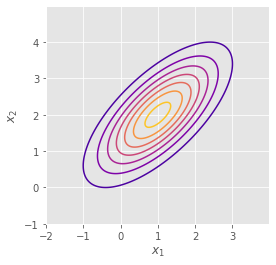

In [19]:
rv = multivariate_normal(mu, cov)
plt.figure(figsize=(4,4))
plt.contour(X, Y, rv.pdf(pos), cmap="plasma")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show();

Gibbsサンプリング

In [20]:
NMCS = 500

sigma12 = cov[1,0]
sigma1 = cov[0,0] ** 0.5
sigma2 = cov[1,1] ** 0.5
rho = sigma12 / (sigma1*sigma2)

z1 = 0.0  # 初期値
z2 = 0.0

z1_mcs = [z1]  # ステップごとの状態を保存するリスト
z2_mcs = [z2]

for i in range(NMCS):
    #f(z1|z2)
    z1 = norm.rvs(loc=rho*z2, scale=(1-rho**2)**0.5)
    z1_mcs.append(z1)
    z2_mcs.append(z2)
    #f(z2|z1)
    z2 = norm.rvs(loc=rho*z1, scale=(1-rho**2)**0.5)
    z1_mcs.append(z1)
    z2_mcs.append(z2)

df1 = pd.DataFrame(mu[0] + np.array(z1_mcs) * sigma1)    
df2 = pd.DataFrame(mu[1] + np.array(z2_mcs) * sigma2)    

In [21]:
df1.head()

,0
0,1.000000
1,0.224705
2,0.224705
3,1.320765
4,1.320765


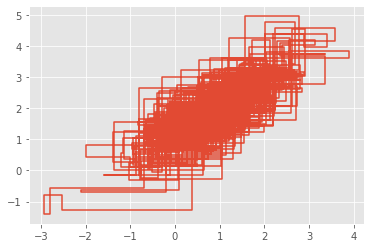

In [26]:
plt.plot(df1[0],df2[0]);

In [27]:
@interact(mcs=(0,100,1))
def animation(mcs=0):
    plt.contour(X, Y, rv.pdf(pos), cmap="plasma")
    plt.xlim([-3.0, 4.5])
    plt.ylim([-1.0, 5.0])
    plt.plot(df1[0][:mcs], df2[0][:mcs])
    plt.show();

interactive(children=(IntSlider(value=0, description='mcs'), Output()), _dom_classes=('widget-interact',))